<h1>DAI-101 Assignment</h1>
<h3>Name:- Siddh Agrawal<br>
Enrollment No.:- 23116090<br>
Branch:- ECE<br>
<br></h3>

<h2>1. Import the dataset from my Google Drive...</h2>

In [1]:
!pip install gdown

In [2]:
import gdown

In [3]:
# https://drive.google.com/file/d/1VEobYsax27YrIS6a2er9g1pWcSPmcc4E/view?usp=drive_link
file_id = "1VEobYsax27YrIS6a2er9g1pWcSPmcc4E"
output = "data.csv"
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1VEobYsax27YrIS6a2er9g1pWcSPmcc4E
To: /content/data.csv
100%|██████████| 317k/317k [00:00<00:00, 48.9MB/s]


'data.csv'

<h2>2. Importing necessary python libraries...</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('data.csv')
df.head() # First 5 rows of the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.shape

(5110, 12)

In [7]:
df.dtypes # contains both numerical and categorical data

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [8]:
df.columns = df.columns.str.title()
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'Bmi',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [9]:
df.isna().sum()  # Checking for any null valuex

,0
Id,0
Gender,0
Age,0
Hypertension,0
Heart_Disease,0
Ever_Married,0
Work_Type,0
Residence_Type,0
Avg_Glucose_Level,0
Bmi,201


In [10]:
df.rename(columns={'Bmi': 'BMI', 'Id': 'ID'}, inplace=True)  # Formatting some columns name.
df.columns

Index(['ID', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [11]:
# Classify the numerical and categorical columns separately
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [12]:
print(num_cols)
print(cat_cols)

Index(['ID', 'Age', 'Hypertension', 'Heart_Disease', 'Avg_Glucose_Level',
       'BMI', 'Stroke'],
      dtype='object')
Index(['Gender', 'Ever_Married', 'Work_Type', 'Residence_Type',
       'Smoking_Status'],
      dtype='object')


In [13]:
stroke=df['Stroke']

In [14]:
stroke_positive = df[df['Stroke'] ==1]
stroke_negative = df[df['Stroke'] == 0]

In [15]:
# Filling the missing values in numerical type column by the median of that respective column
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

<ipython-input-15-06aeac2ec059>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [16]:
# Filling the missing values in categorical type column by the most occuring element of that respective column
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

<ipython-input-16-5e8b9a3018d0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [17]:
df.isna().sum()  # All missing values are filled accordingly

,0
ID,0
Gender,0
Age,0
Hypertension,0
Heart_Disease,0
Ever_Married,0
Work_Type,0
Residence_Type,0
Avg_Glucose_Level,0
BMI,0


In [18]:
# Checking for duplicated values in the dataset if there is any then drop that data directly.
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

ID - Lower Bound: -37669.875, Upper Bound: 110093.125
Age - Lower Bound: -29.0, Upper Bound: 115.0
Hypertension - Lower Bound: 0.0, Upper Bound: 0.0
Heart_Disease - Lower Bound: 0.0, Upper Bound: 0.0
Avg_Glucose_Level - Lower Bound: 24.863750000000017, Upper Bound: 162.85374999999996
BMI - Lower Bound: 9.150000000000004, Upper Bound: 45.55
Stroke - Lower Bound: 0.0, Upper Bound: 0.0


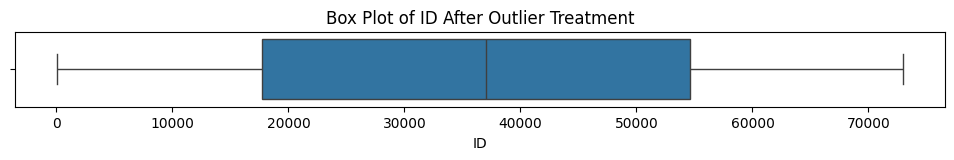

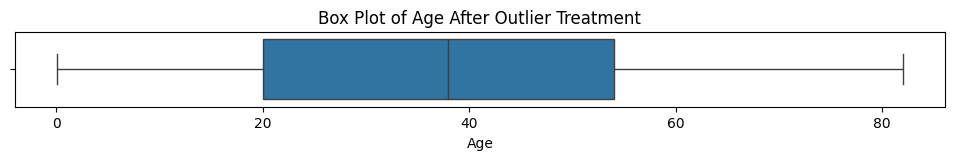

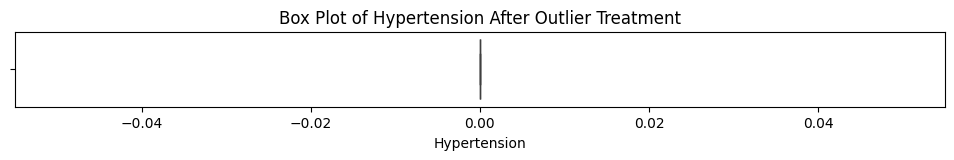

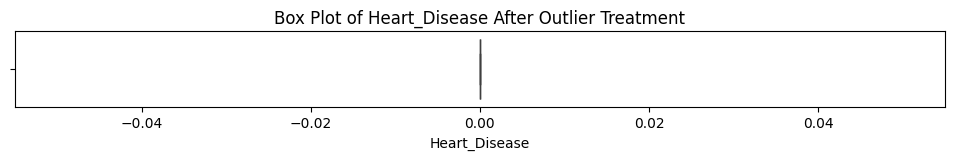

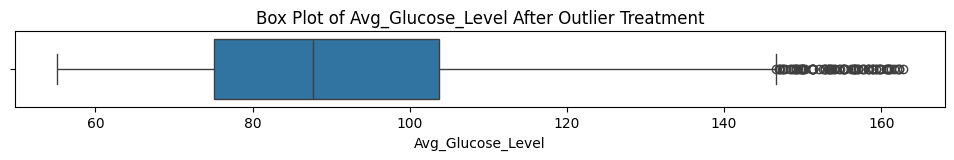

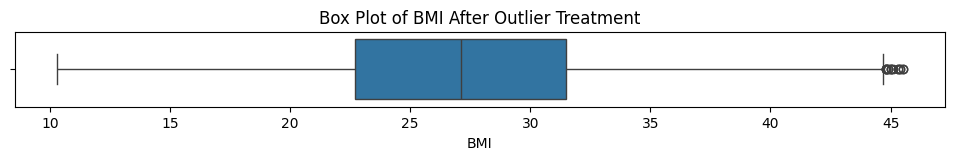

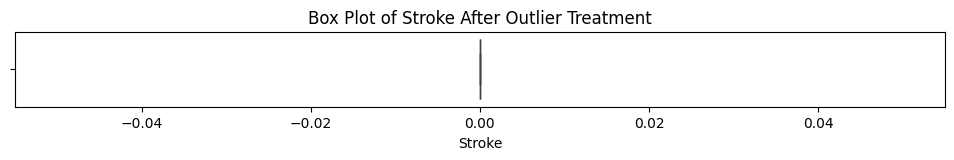

In [19]:
# For detecting and treating outliers for each numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Option 1: Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Option 2: Cap (winsorize) the outliers
    # df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

import matplotlib.pyplot as plt
import seaborn as sns

j=1
for col in num_cols:
    plt.figure(figsize=(12, 8))
    plt.subplot(len(num_cols),1, j)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col} After Outlier Treatment")
    plt.show()
    j+=1


In [33]:
df.shape

(3788, 12)

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    # Convert text to lower case and remove leading/trailing whitespace
    df[col] = df[col].str.lower().str.strip()

    # some corrections has been made for just practising.
    corrections = {
        'male': 'Male',
        'female': 'Female',
        'urban': 'Urban',
        'rural': 'Rural'
    }
    df[col] = df[col].replace(corrections)

# Unique values in the each categorical column
for col in cat_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())


Unique values in Gender:
['Male' 'Female' 'other']
Unique values in Ever_Married:
['no' 'yes']
Unique values in Work_Type:
['children' 'private' 'never_worked' 'govt_job' 'self-employed']
Unique values in Residence_Type:
['Rural' 'Urban']
Unique values in Smoking_Status:
['unknown' 'formerly smoked' 'smokes' 'never smoked']


<h2> 2. Exploratory Data Analysis (EDA) </h2>

<h3> Univariate Analysis </h3>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 249 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3788 non-null   int64  
 1   Gender             3788 non-null   object 
 2   Age                3788 non-null   float64
 3   Hypertension       3788 non-null   int64  
 4   Heart_Disease      3788 non-null   int64  
 5   Ever_Married       3788 non-null   object 
 6   Work_Type          3788 non-null   object 
 7   Residence_Type     3788 non-null   object 
 8   Avg_Glucose_Level  3788 non-null   float64
 9   BMI                3788 non-null   float64
 10  Smoking_Status     3788 non-null   object 
 11  Stroke             3788 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 384.7+ KB


In [22]:
df.describe()

,ID,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Stroke
count,3788.000000,3788.000000,3788.0,3788.0,3788.000000,3788.000000,3788.0
mean,36508.322862,37.512714,0.0,0.0,91.058350,27.386484,0.0
std,21111.538548,21.596830,0.0,0.0,22.051288,6.595004,0.0
min,67.000000,0.080000,0.0,0.0,55.120000,10.300000,0.0
25%,17738.250000,20.000000,0.0,0.0,75.060000,22.700000,0.0
50%,37018.000000,38.000000,0.0,0.0,87.720000,27.100000,0.0
75%,54575.250000,54.000000,0.0,0.0,103.675000,31.500000,0.0
max,72940.000000,82.000000,0.0,0.0,162.720000,45.500000,0.0


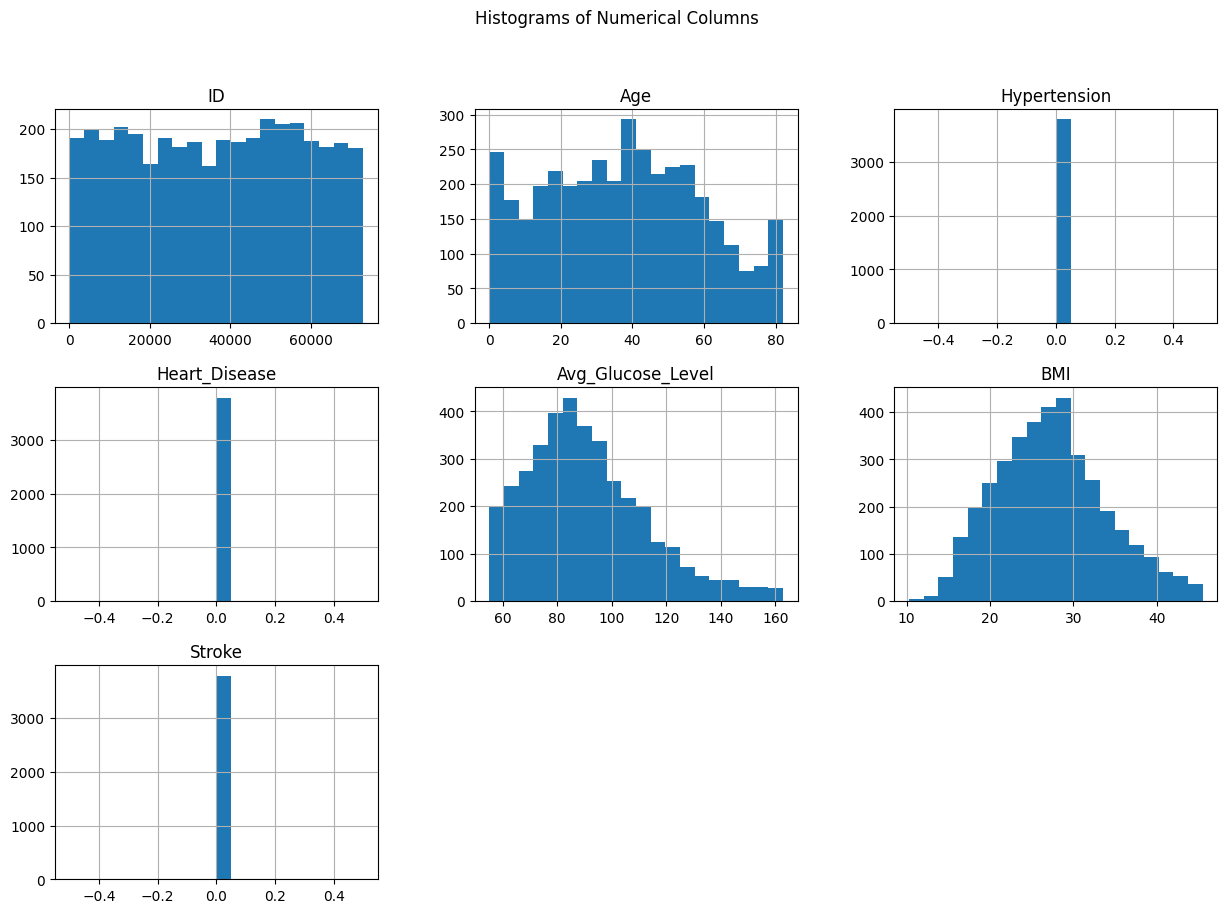

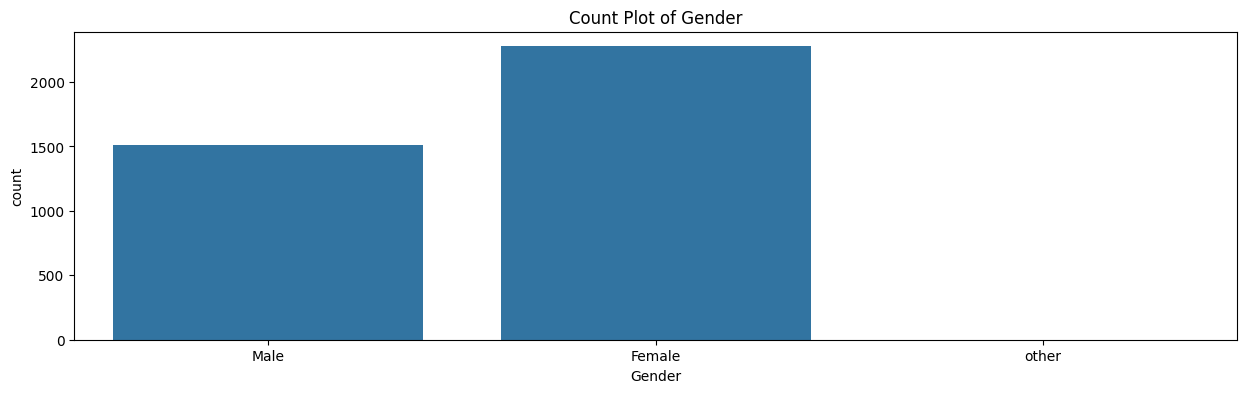

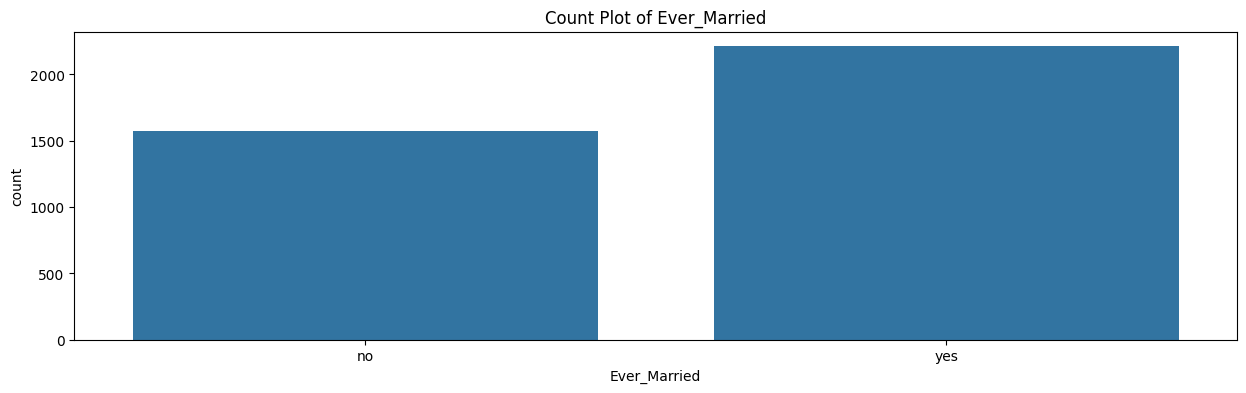

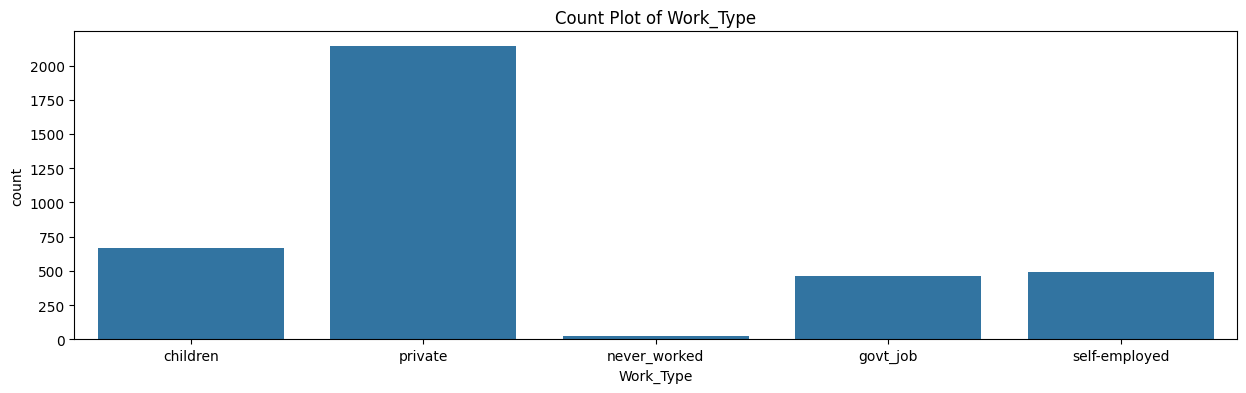

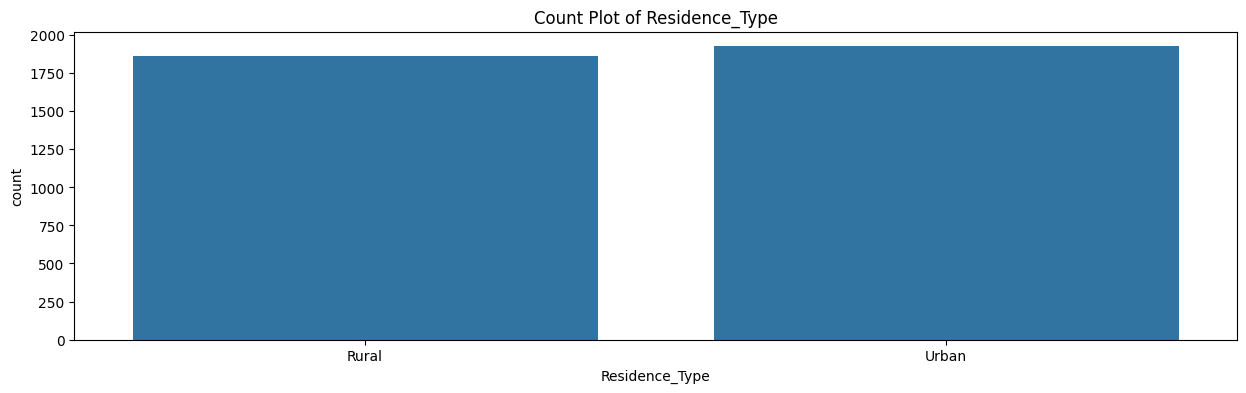

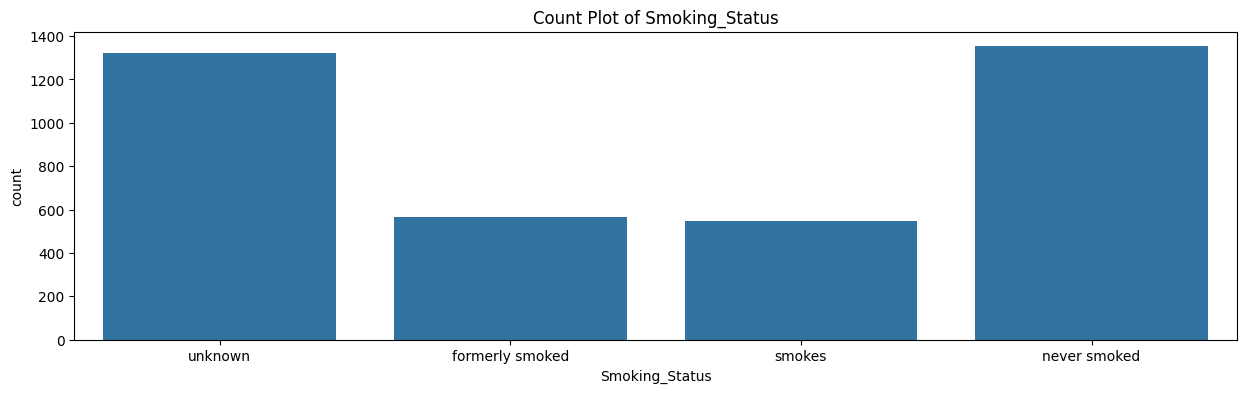

In [23]:
# Histograms
# Count plots for numerical columns
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()


# Count plots for categorical columns
for col in cat_cols:
    plt.figure(figsize=(15, 4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()


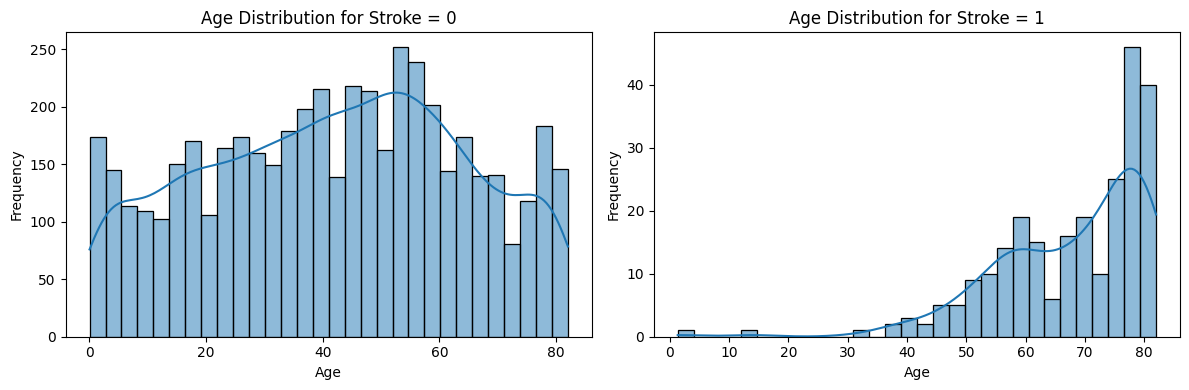

In [24]:
# Frequency plot of having stoke or not stroke with the age on x-axis.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=stroke_negative, x='Age', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution for Stroke = 0')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data=stroke_positive, x='Age', bins=30, kde=True,ax=axes[1])
axes[1].set_title('Age Distribution for Stroke = 1')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
df['BMI'].skew()

0.3363872533205131

Text(0.5, 1.0, 'BMI')

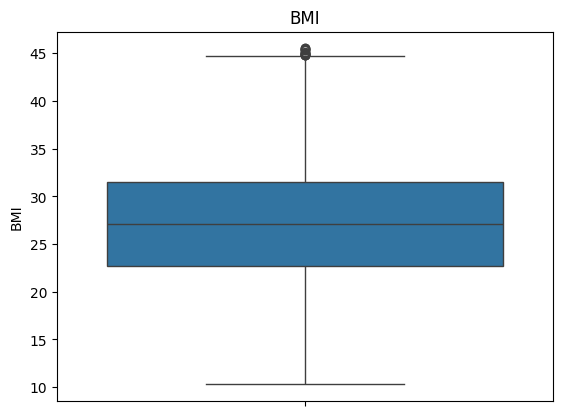

In [26]:
sns.boxplot(df['BMI'])
plt.title('BMI')

<h3> Multivariate Analysis</h3>

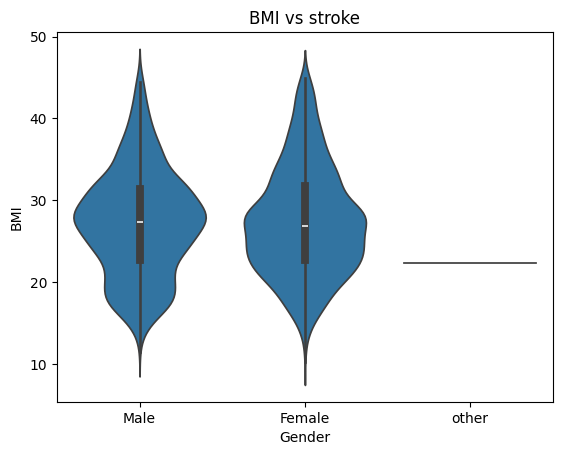

In [27]:
sns.violinplot(x=df['Gender'], y=df['BMI'])
plt.title("BMI vs Gender")
plt.show()

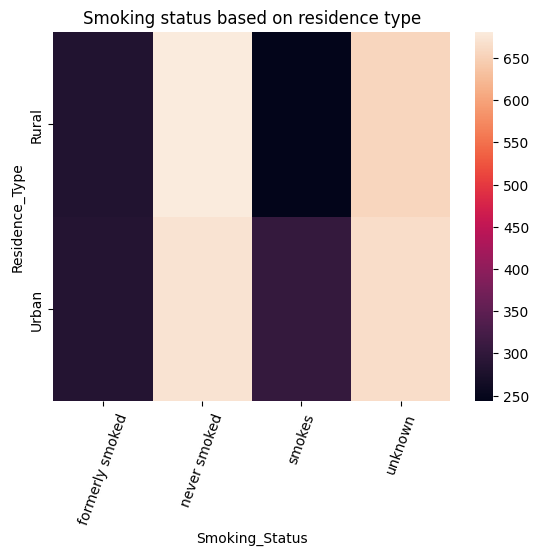

In [28]:
sns.heatmap(pd.crosstab(df['Residence_Type'], df['Smoking_Status']))
plt.title('Smoking status based on residence type')
plt.xticks(rotation=70)
plt.show()

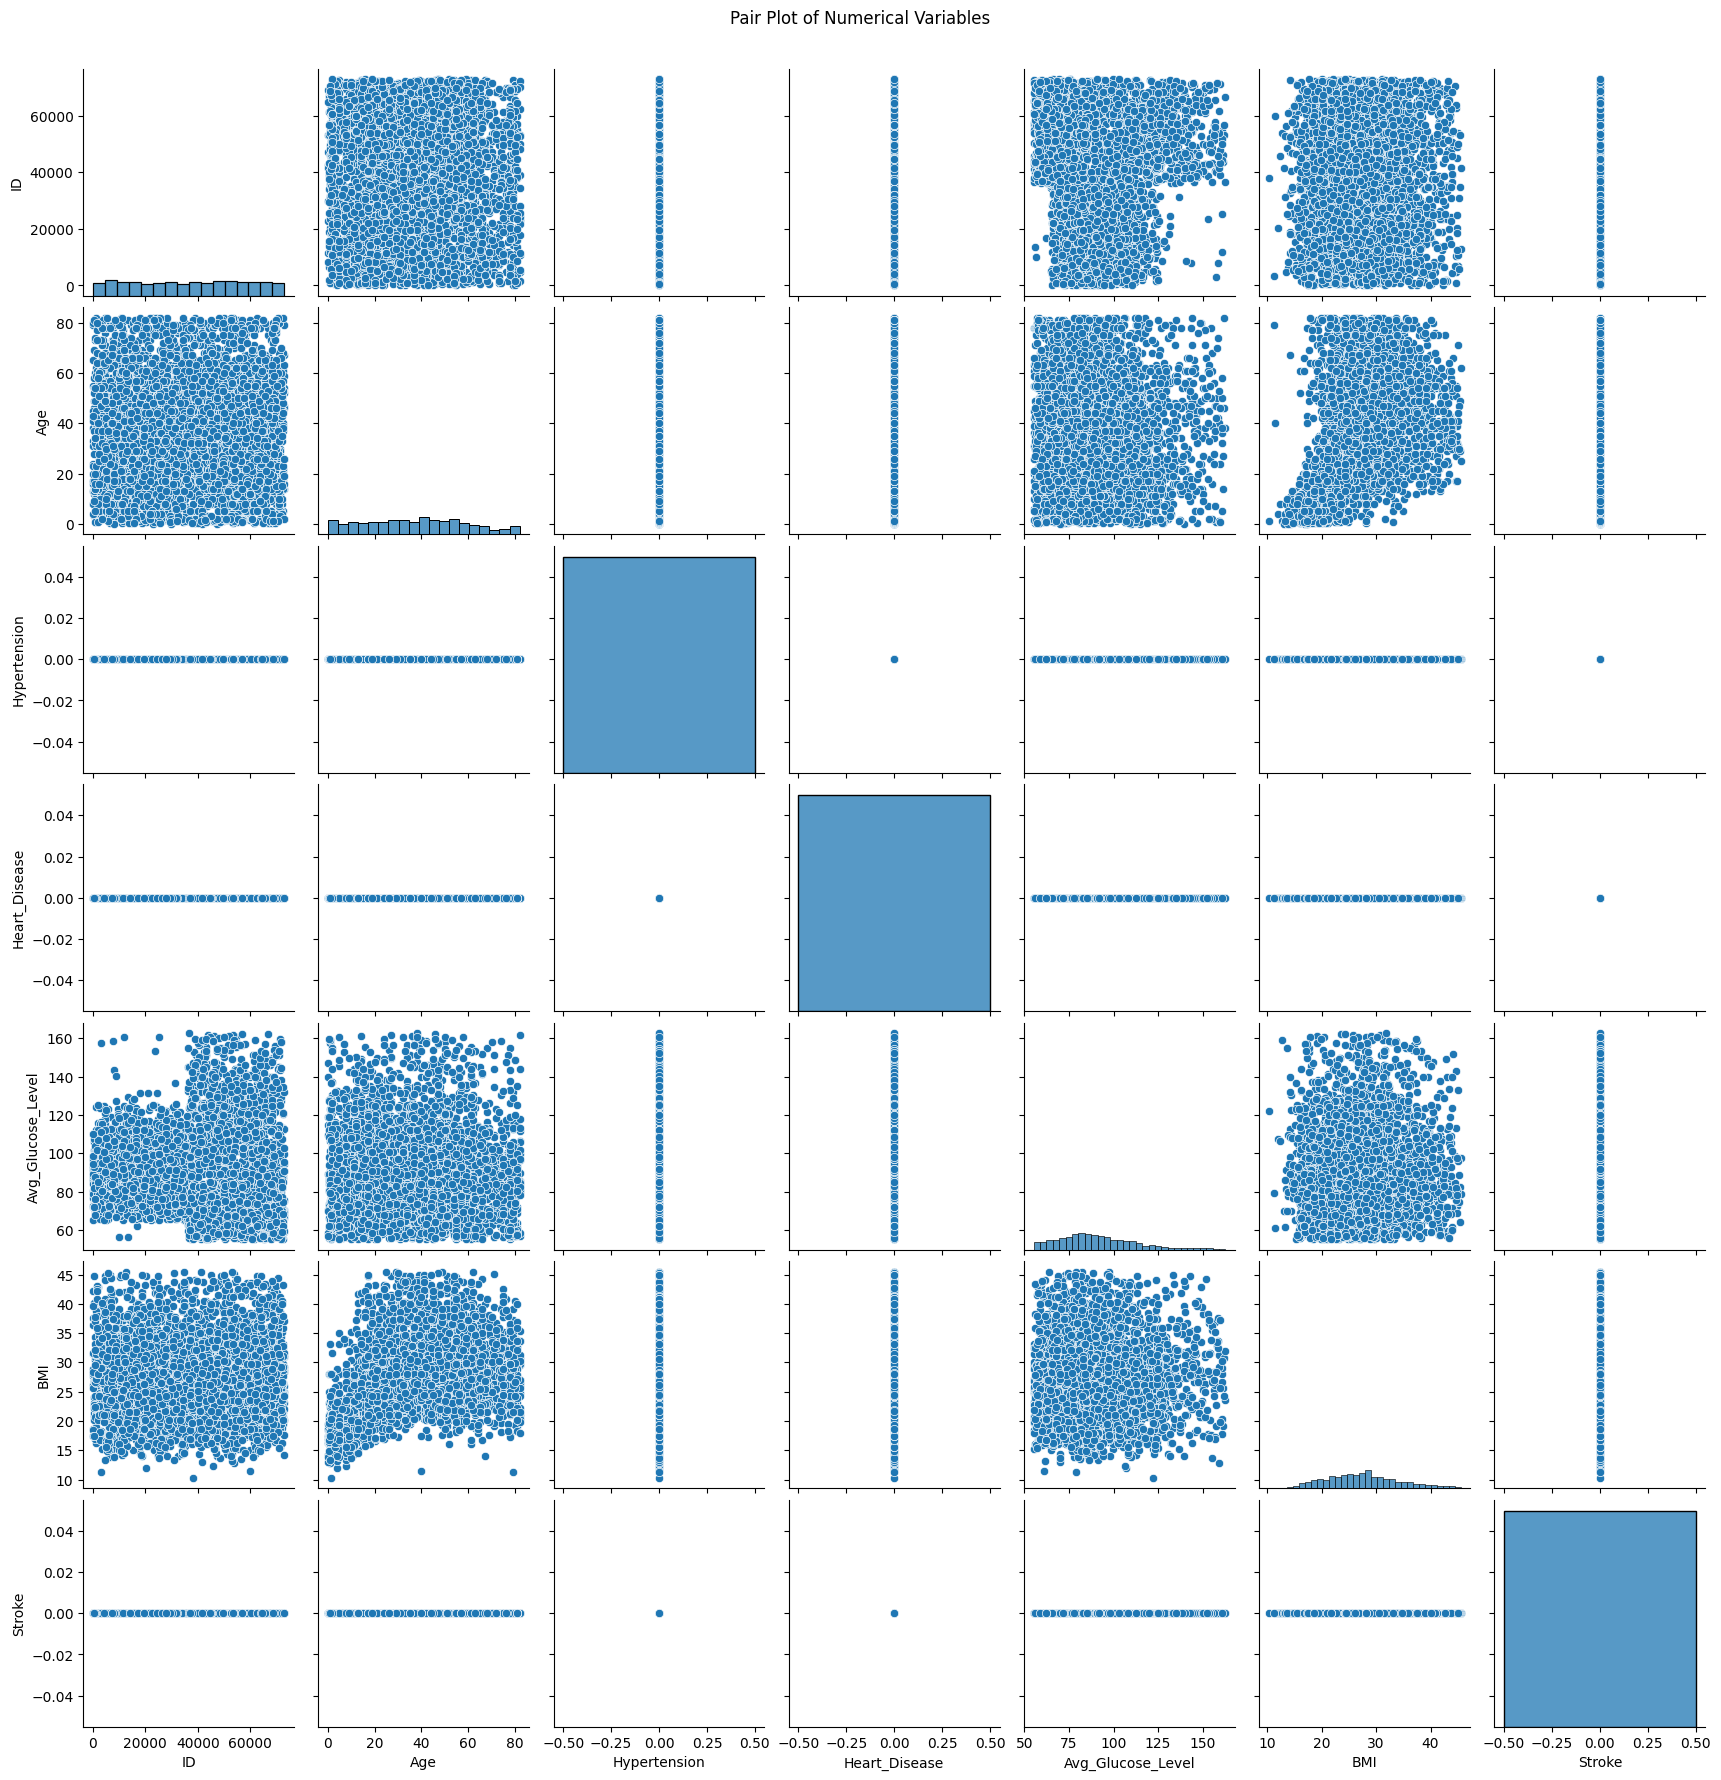

In [29]:
sns.pairplot(df[num_cols])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

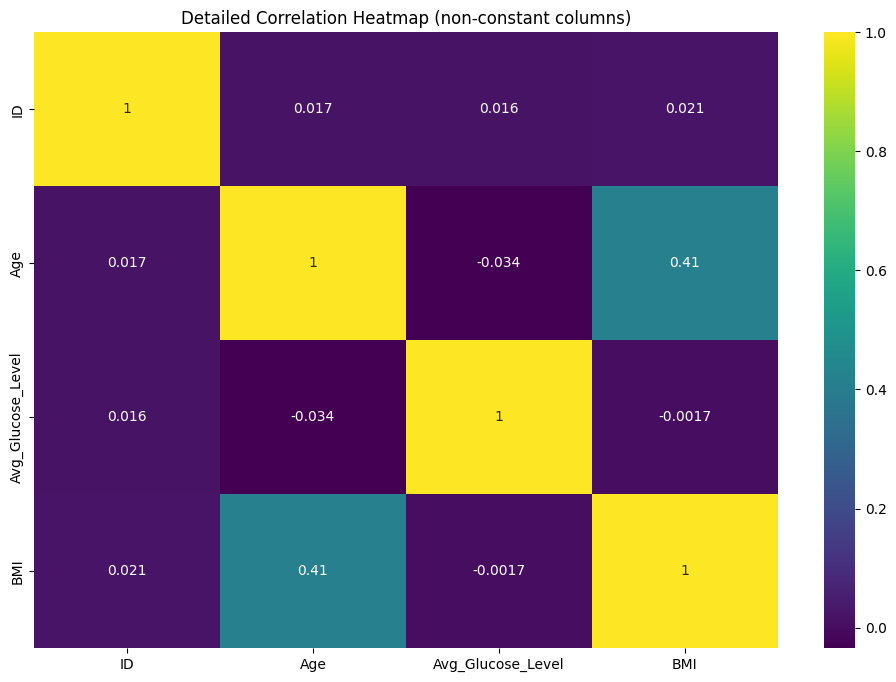

In [30]:
# Plot a detailed heatmap for correlations among numerical variables
non_constant = [col for col in num_cols if df[col].nunique() > 1]

plt.figure(figsize=(12, 8))
sns.heatmap(df[non_constant].corr(), annot=True, cmap="viridis")
plt.title("Detailed Correlation Heatmap (non-constant columns)")
plt.show()


Grouped mean of 'ID' by 'Gender':
   Gender            ID
0  Female  36310.557751
1    Male  36793.530464
2   other  56156.000000


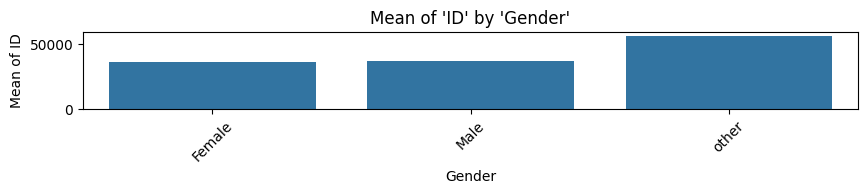

Grouped mean of 'Age' by 'Gender':
   Gender        Age
0  Female  38.862328
1    Male  35.485192
2   other  26.000000


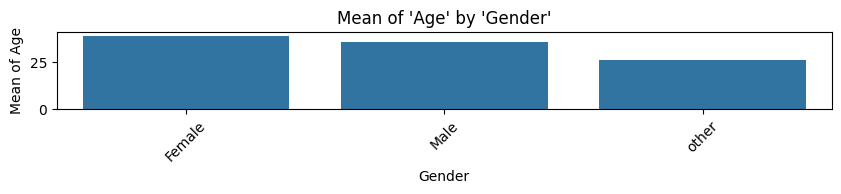

Grouped mean of 'Hypertension' by 'Gender':
   Gender  Hypertension
0  Female           0.0
1    Male           0.0
2   other           0.0


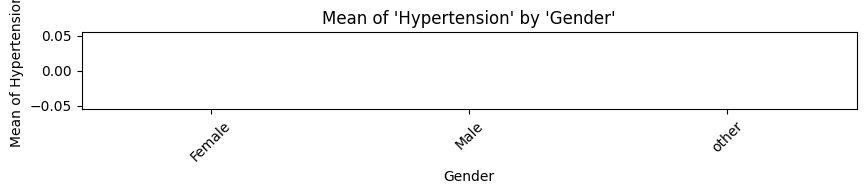

Grouped mean of 'Heart_Disease' by 'Gender':
   Gender  Heart_Disease
0  Female            0.0
1    Male            0.0
2   other            0.0


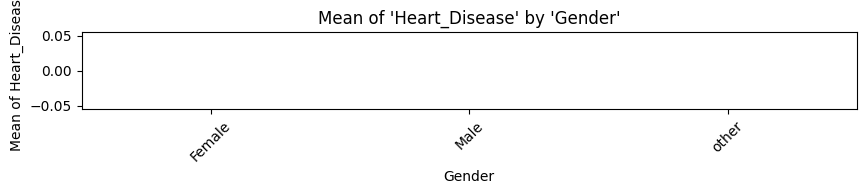

Grouped mean of 'Avg_Glucose_Level' by 'Gender':
   Gender  Avg_Glucose_Level
0  Female          90.529947
1    Male          91.820536
2   other         143.330000


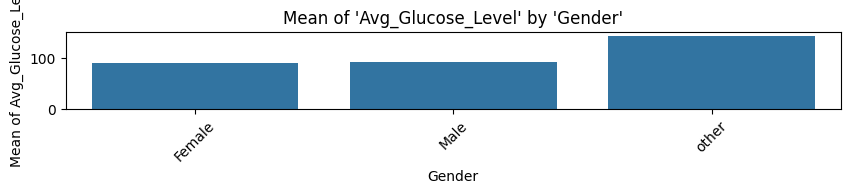

Grouped mean of 'BMI' by 'Gender':
   Gender        BMI
0  Female  27.470707
1    Male  27.262781
2   other  22.400000


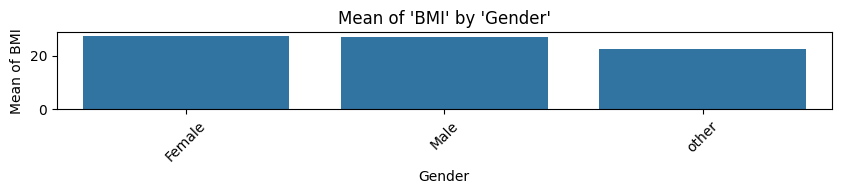

Grouped mean of 'Stroke' by 'Gender':
   Gender  Stroke
0  Female     0.0
1    Male     0.0
2   other     0.0


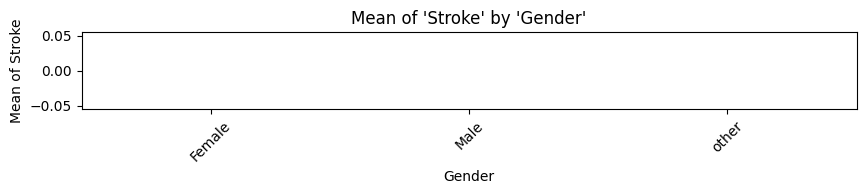

Grouped mean of 'ID' by 'Ever_Married':
  Ever_Married            ID
0           no  36000.605330
1          yes  36870.060127


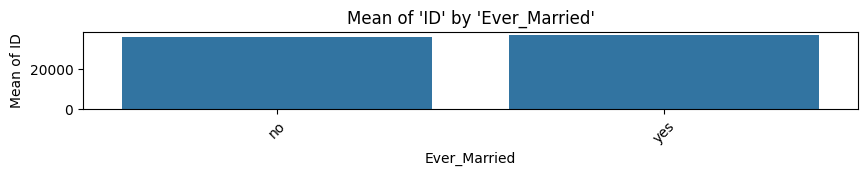

Grouped mean of 'Age' by 'Ever_Married':
  Ever_Married        Age
0           no  19.462030
1          yes  50.373418


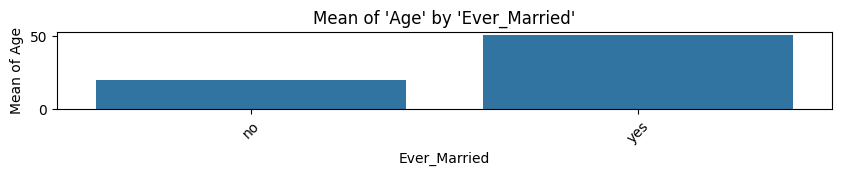

Grouped mean of 'Hypertension' by 'Ever_Married':
  Ever_Married  Hypertension
0           no           0.0
1          yes           0.0


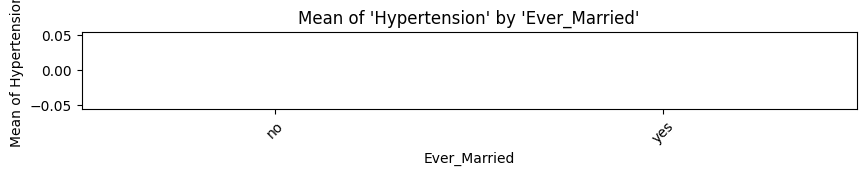

Grouped mean of 'Heart_Disease' by 'Ever_Married':
  Ever_Married  Heart_Disease
0           no            0.0
1          yes            0.0


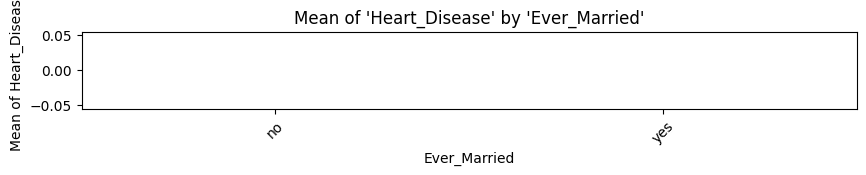

Grouped mean of 'Avg_Glucose_Level' by 'Ever_Married':
  Ever_Married  Avg_Glucose_Level
0           no          91.437709
1          yes          90.788065


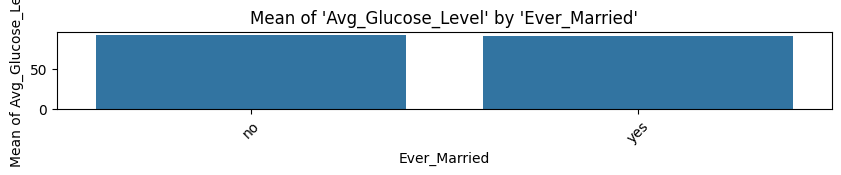

Grouped mean of 'BMI' by 'Ever_Married':
  Ever_Married       BMI
0           no  24.41250
1          yes  29.50538


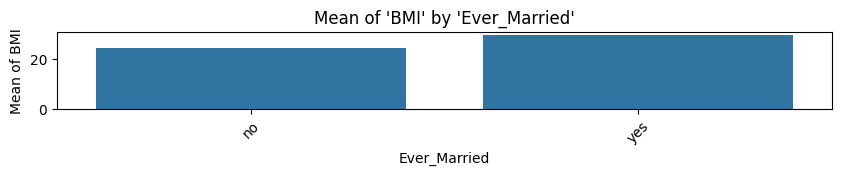

Grouped mean of 'Stroke' by 'Ever_Married':
  Ever_Married  Stroke
0           no     0.0
1          yes     0.0


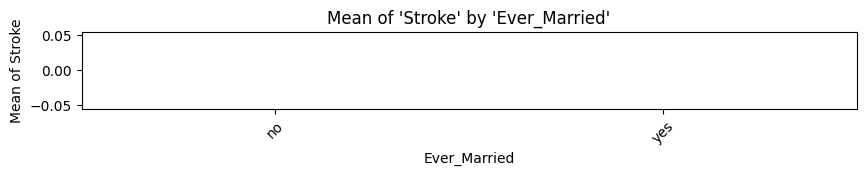

Grouped mean of 'ID' by 'Work_Type':
       Work_Type            ID
0       children  35439.619760
1       govt_job  36871.219355
2   never_worked  38274.409091
3        private  36784.105042
4  self-employed  36336.362525


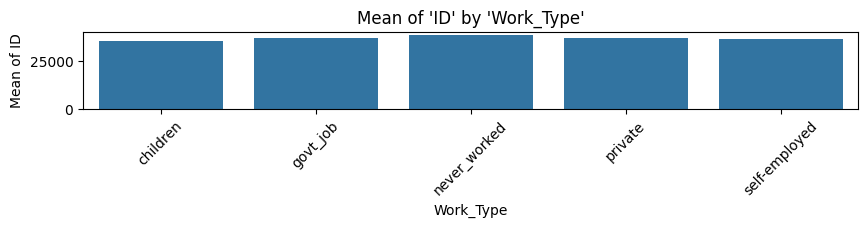

Grouped mean of 'Age' by 'Work_Type':
       Work_Type        Age
0       children   6.840060
1       govt_job  47.544086
2   never_worked  16.181818
3        private  40.983660
4  self-employed  55.556008


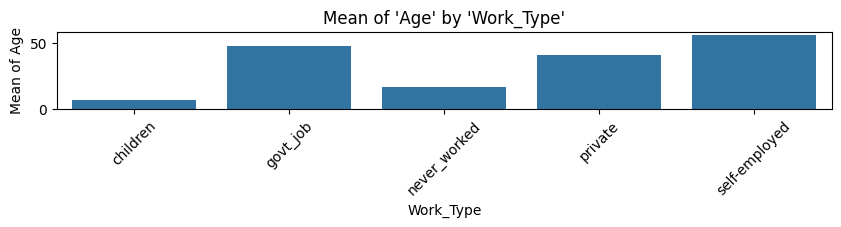

Grouped mean of 'Hypertension' by 'Work_Type':
       Work_Type  Hypertension
0       children           0.0
1       govt_job           0.0
2   never_worked           0.0
3        private           0.0
4  self-employed           0.0


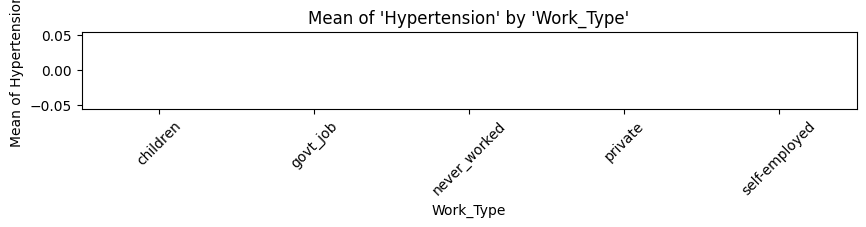

Grouped mean of 'Heart_Disease' by 'Work_Type':
       Work_Type  Heart_Disease
0       children            0.0
1       govt_job            0.0
2   never_worked            0.0
3        private            0.0
4  self-employed            0.0


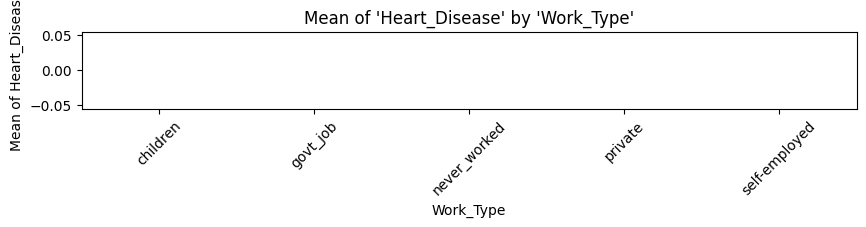

Grouped mean of 'Avg_Glucose_Level' by 'Work_Type':
       Work_Type  Avg_Glucose_Level
0       children          92.251871
1       govt_job          90.374258
2   never_worked          96.042727
3        private          91.032782
4  self-employed          89.970652


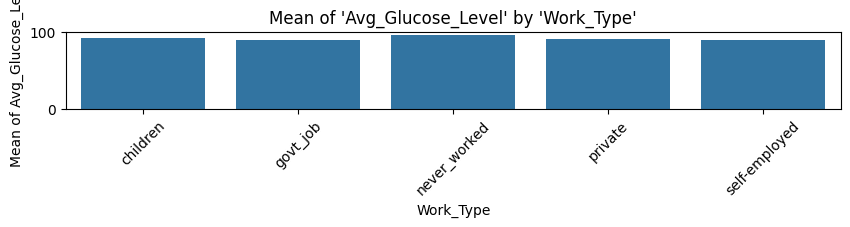

Grouped mean of 'BMI' by 'Work_Type':
       Work_Type        BMI
0       children  20.138772
1       govt_job  29.285806
2   never_worked  25.545455
3        private  28.857470
4  self-employed  29.113442


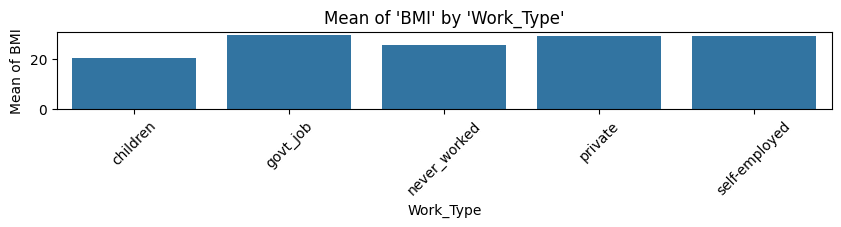

Grouped mean of 'Stroke' by 'Work_Type':
       Work_Type  Stroke
0       children     0.0
1       govt_job     0.0
2   never_worked     0.0
3        private     0.0
4  self-employed     0.0


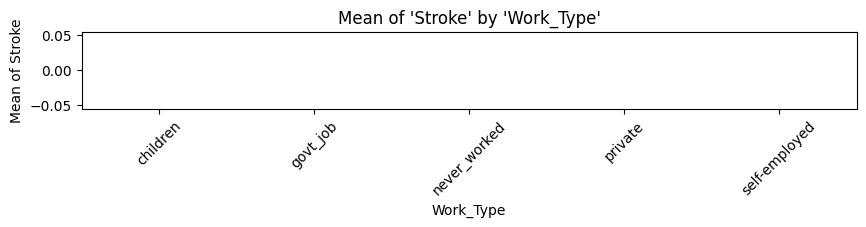

Grouped mean of 'ID' by 'Residence_Type':
  Residence_Type            ID
0          Rural  36258.567132
1          Urban  36749.779335


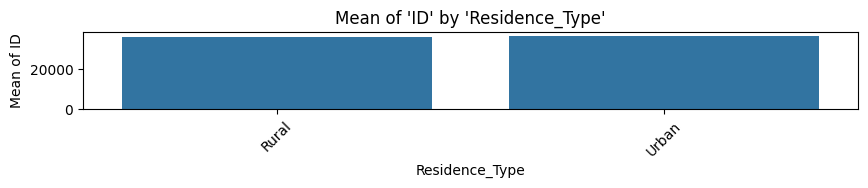

Grouped mean of 'Age' by 'Residence_Type':
  Residence_Type        Age
0          Rural  37.131923
1          Urban  37.880852


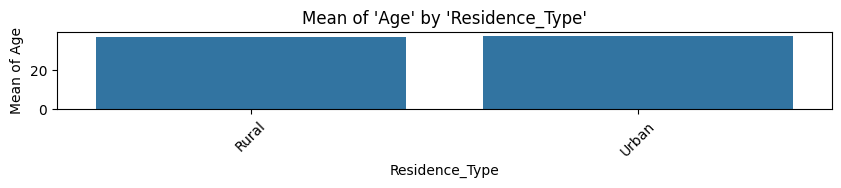

Grouped mean of 'Hypertension' by 'Residence_Type':
  Residence_Type  Hypertension
0          Rural           0.0
1          Urban           0.0


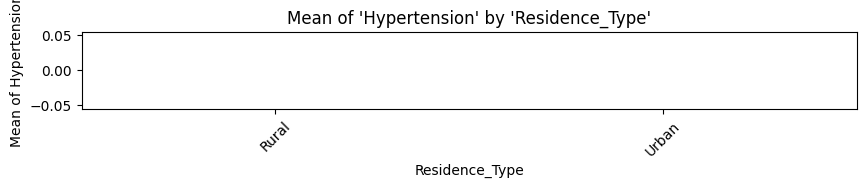

Grouped mean of 'Heart_Disease' by 'Residence_Type':
  Residence_Type  Heart_Disease
0          Rural            0.0
1          Urban            0.0


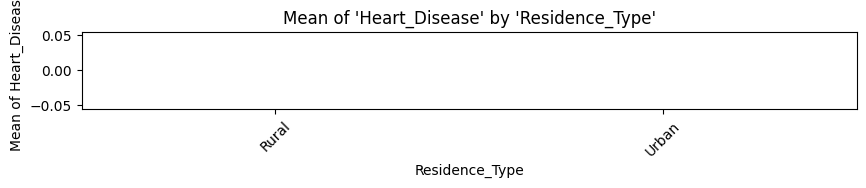

Grouped mean of 'Avg_Glucose_Level' by 'Residence_Type':
  Residence_Type  Avg_Glucose_Level
0          Rural          91.549876
1          Urban          90.583157


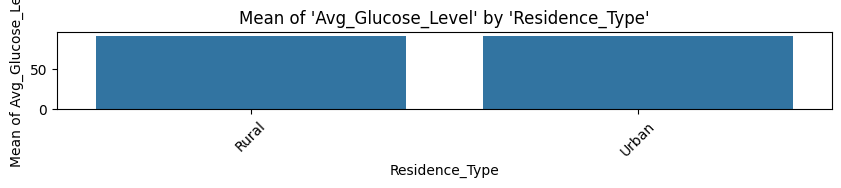

Grouped mean of 'BMI' by 'Residence_Type':
  Residence_Type        BMI
0          Rural  27.305424
1          Urban  27.464849


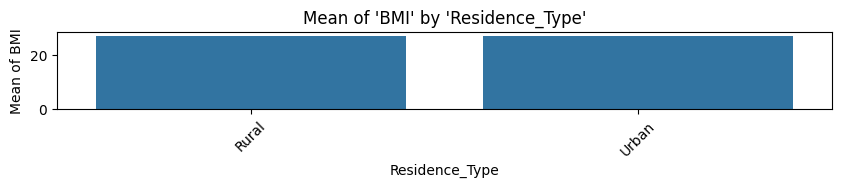

Grouped mean of 'Stroke' by 'Residence_Type':
  Residence_Type  Stroke
0          Rural     0.0
1          Urban     0.0


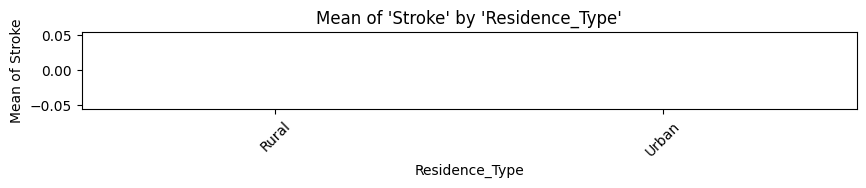

Grouped mean of 'ID' by 'Smoking_Status':
    Smoking_Status            ID
0  formerly smoked  36752.042328
1     never smoked  36909.755358
2           smokes  36600.575868
3          unknown  35954.356548


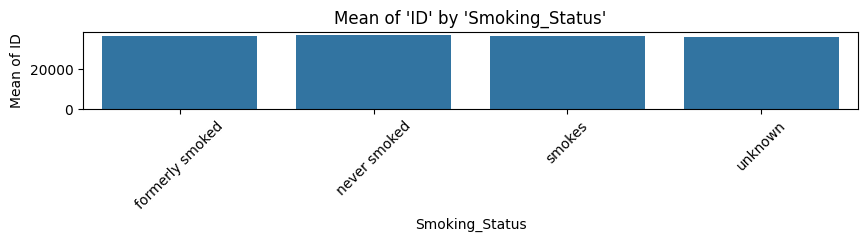

Grouped mean of 'Age' by 'Smoking_Status':
    Smoking_Status        Age
0  formerly smoked  49.754850
1     never smoked  41.463415
2           smokes  43.272395
3          unknown  25.826768


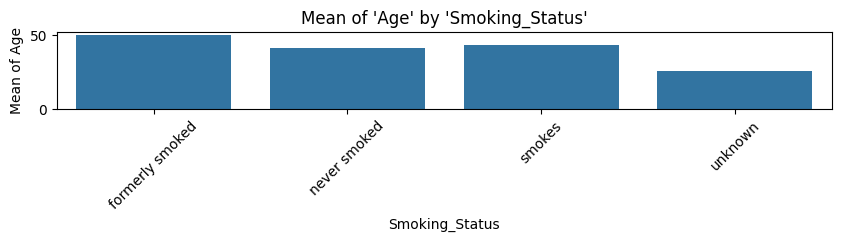

Grouped mean of 'Hypertension' by 'Smoking_Status':
    Smoking_Status  Hypertension
0  formerly smoked           0.0
1     never smoked           0.0
2           smokes           0.0
3          unknown           0.0


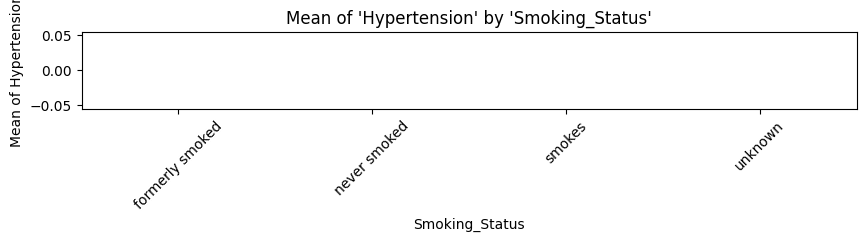

Grouped mean of 'Heart_Disease' by 'Smoking_Status':
    Smoking_Status  Heart_Disease
0  formerly smoked            0.0
1     never smoked            0.0
2           smokes            0.0
3          unknown            0.0


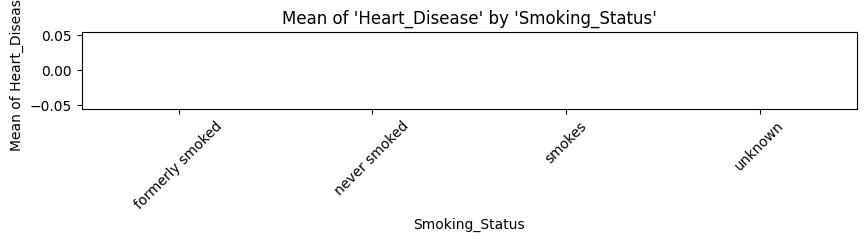

Grouped mean of 'Avg_Glucose_Level' by 'Smoking_Status':
    Smoking_Status  Avg_Glucose_Level
0  formerly smoked          89.437513
1     never smoked          91.248500
2           smokes          91.390932
3          unknown          91.421575


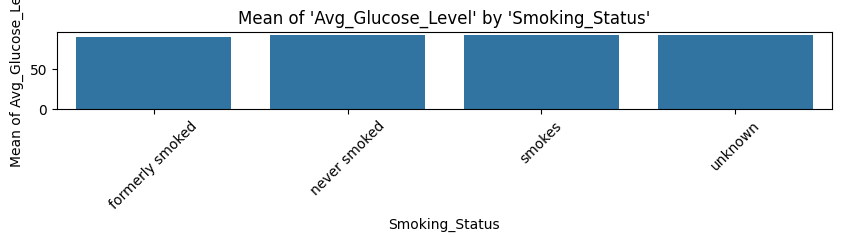

Grouped mean of 'BMI' by 'Smoking_Status':
    Smoking_Status        BMI
0  formerly smoked  29.371076
1     never smoked  28.573171
2           smokes  29.301828
3          unknown  24.526117


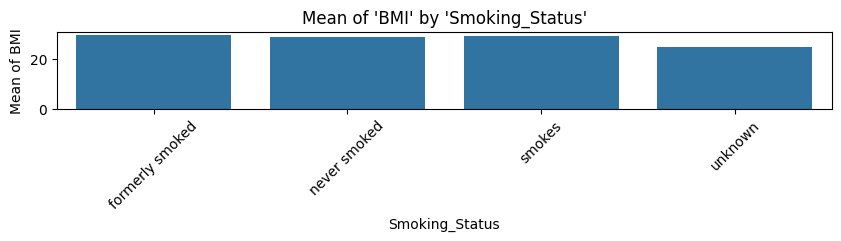

Grouped mean of 'Stroke' by 'Smoking_Status':
    Smoking_Status  Stroke
0  formerly smoked     0.0
1     never smoked     0.0
2           smokes     0.0
3          unknown     0.0


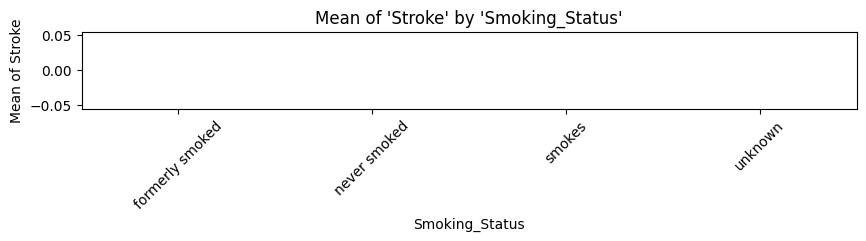

In [31]:
# For every categorical and numerical column combination to compute grouped means
for cat in cat_cols:
    for num in num_cols:
        # Compute the grouped mean of the numerical variable by the categorical variable
        grouped = df.groupby(cat)[num].mean().reset_index()

        print(f"Grouped mean of '{num}' by '{cat}':")
        print(grouped)

        plt.figure(figsize=(10, 1))
        sns.barplot(x=cat, y=num, data=grouped)
        plt.title(f"Mean of '{num}' by '{cat}'")
        plt.xlabel(cat)
        plt.ylabel(f"Mean of {num}")
        plt.xticks(rotation=45)
        plt.show()
